# A Comparative Analysis of Linear and Polynomial Regression on Medical Cost Personal Datasets

Dataset link: https://www.kaggle.com/datasets/mirichoi0218/insurance

# 1. Do visualization and analysis to understand the dataset 


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")
df[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


in this dataset,we have 1338 rows and 7 columns, where charges is the output column and the rest of the columns are input columns.input columns are medical patients data and I intend to predict the charges.<br>

# Checking Null Values

In [5]:
#null value check
df.isnull().sum()#no null values present in this dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

As there are no null values present in this dataset so no need to handle. 


# Duplicacy check

In [6]:
df[df.duplicated(keep=False)]#keep=false showcases the row for which it was duplicated 

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df=df.drop_duplicates()#removes the duplicate row
df.shape

(1337, 7)

I have found 195,581 duplicate rows in this dataset. So I have removed one of these duplicated rows as it would affect performance, take up extra storage, and make calculations complicated as well

# Analyze the categorical data

In [8]:
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

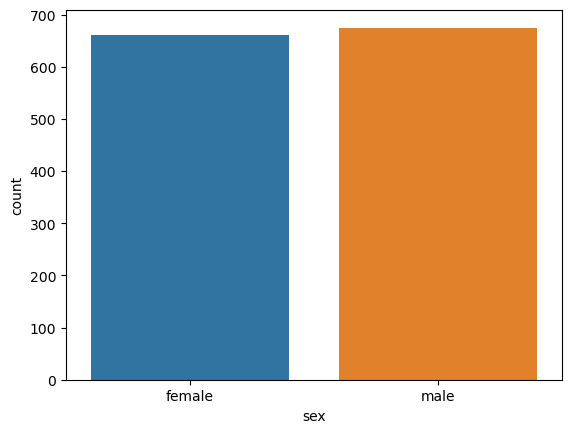

In [9]:
sns.countplot(df.sex,data=df)

the numbers of male and female are very close

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

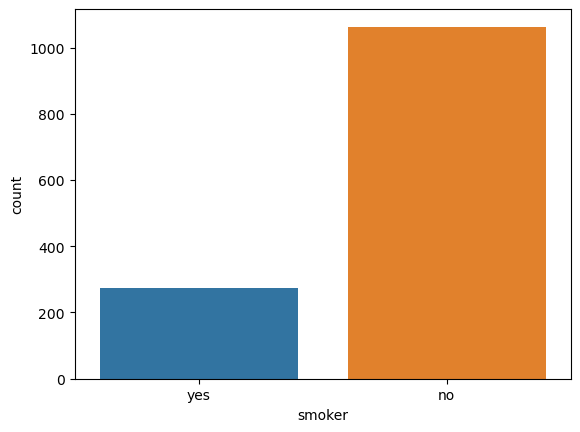

In [10]:
sns.countplot(df.smoker)

most of the persons in this dataset are non smoker

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

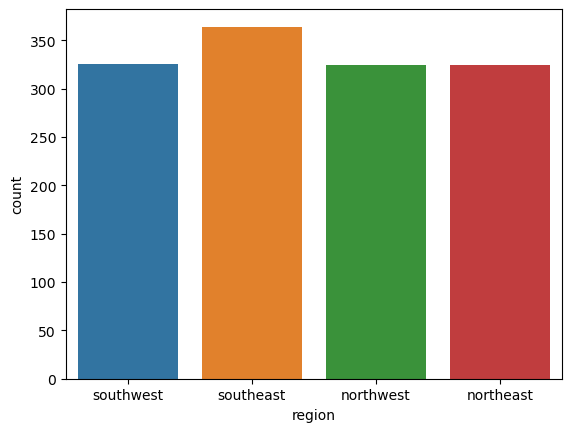

In [11]:
sns.countplot(df.region)

from this countplot, we found that most of the people belong to the southeast area.

<AxesSubplot:xlabel='age', ylabel='charges'>

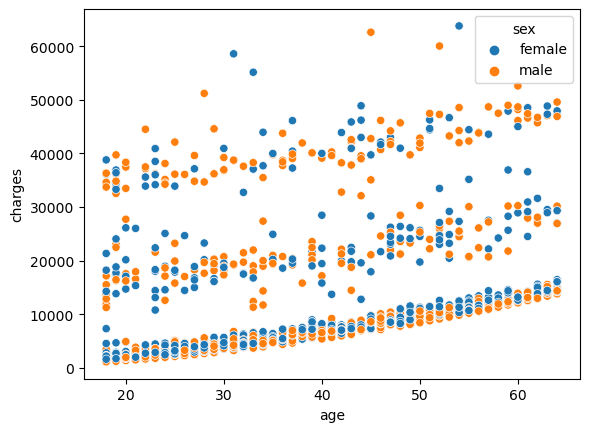

In [12]:
sns.scatterplot(x='age',y='charges',hue='sex',data=df)


From this plot, we inferred that ages and charges maintain a positive relationship where charges increase with age. We can relate this issue to our real-life scenarios. Teenagers or younger people have greater immunity than older people. In some cases, males and females face a sudden attack or accident that increases the medical charges.

# Analyze the target column

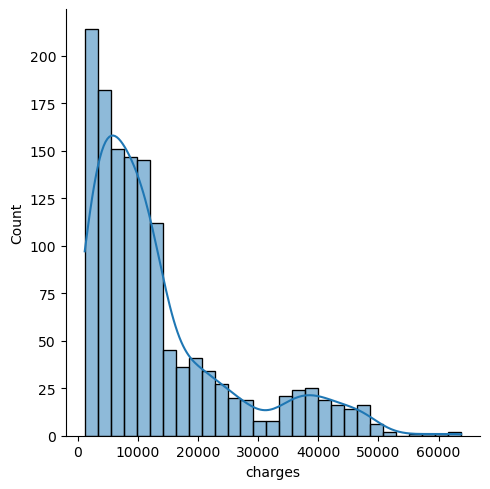

In [13]:
sns.displot(df['charges'],kde=True)

from the distribution plot of the charges column, we inferred that most of the patients pay a lower amount of charges.<br>
It may be because the diseases they had faced were not that severe. Also, patient occasionally paid higher charges when they had any chronic or long-term diseases

* Some columns contain object data type so let's convert it into  numeric form 


# Label Encoder

converting all categorical column to numerical one

In [14]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    print(f'cols for label encoding : {columnsToEncode}')
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df
df= Encoder(df)
df

cols for label encoding : ['sex', 'smoker', 'region']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#  Now the categorical columns of the dataset become as follows:

for sex column:
* male=1
* female=0

for smoker column:
* smoker= 1
* non-smoker= 2

for region column:
* northeast=0
* northwest=1
* southeast= 2
* southwast= 3

* Now all of the features of our dataset are in numerical form.
* let's see the relationship between features and target variable using correlation

# Applying Pearson correlation

<AxesSubplot:>

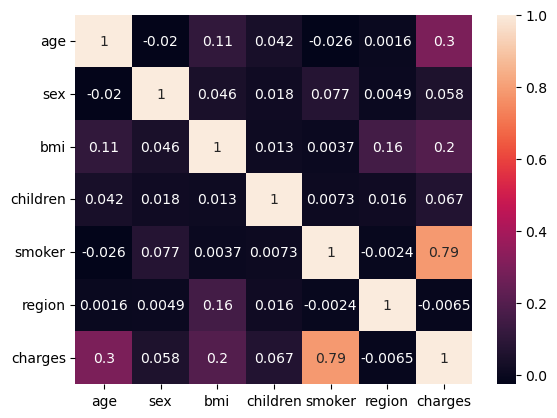

In [15]:
sns.heatmap(df.corr(method='pearson'),annot=True)


from this correlational map we have found that our target column(charges) is highly related to smoker(.79) column and 
then age(.3),bmi(.2) column.

As feature selection,we have choosen smoker, age,bmi as features.

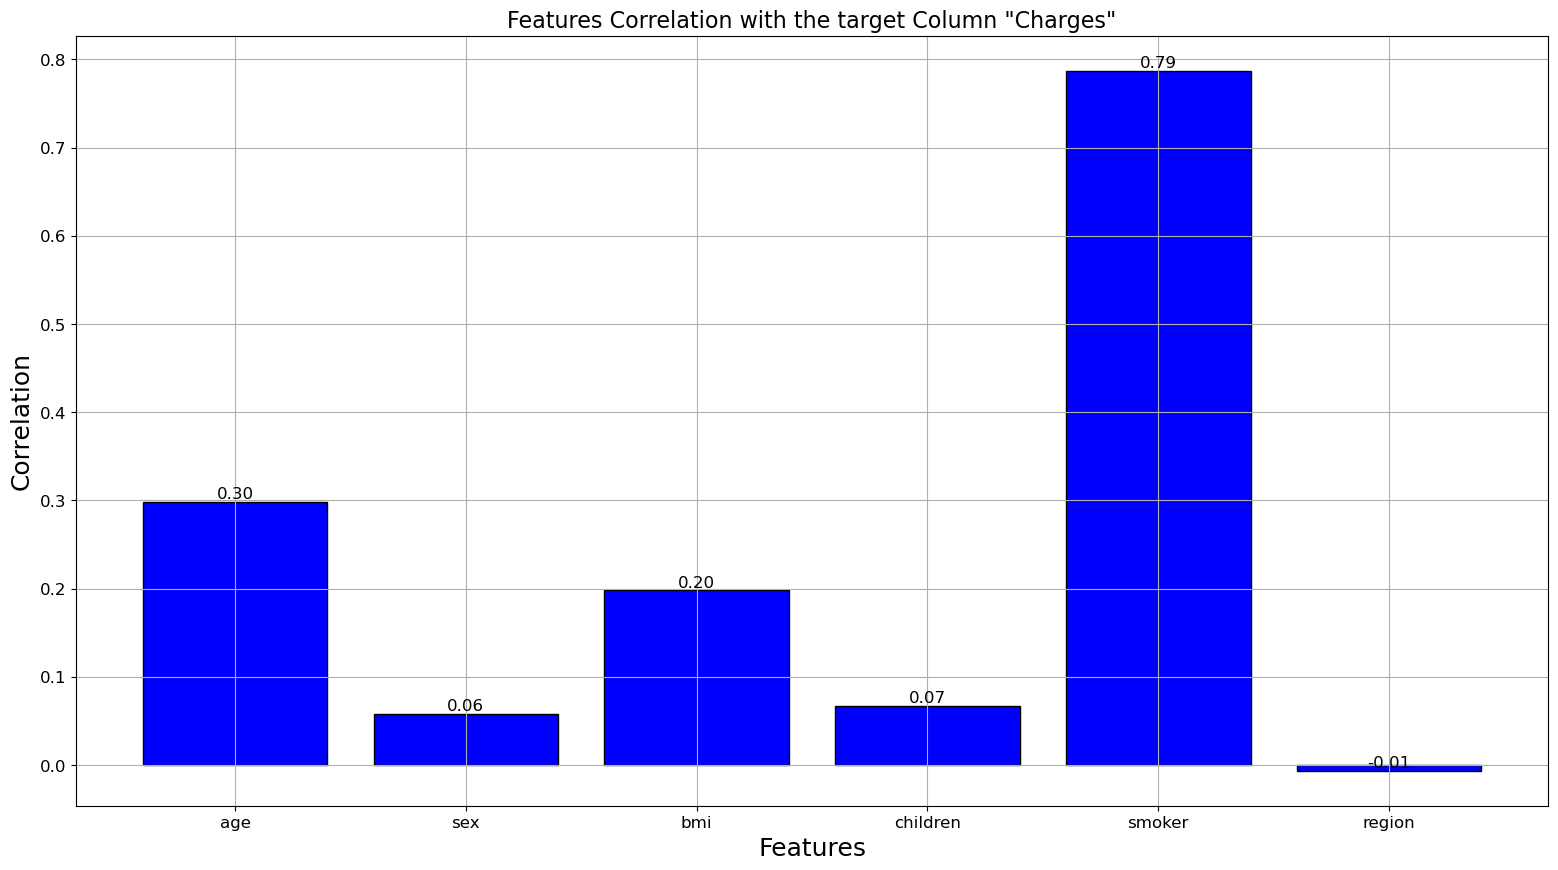

In [16]:
df2= df.drop(columns='charges') # Creating a new variable without the label column 'charges'
corrw = df2.corrwith(df['charges']) # Saving the corrolation of df2 with lablel in valribale corrw 

# Plotting the bar chart using matplotlib
plt.figure(figsize=(19, 10))
plt.bar(corrw.index, corrw.values, color='blue', edgecolor='black')

# Adding title, labels, and grid to the plot
plt.title('Features Correlation with the target Column "Charges"', fontsize=16)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding annotations to the bars
for i, value in enumerate(corrw.values):
    label = f"{value:.2f}"
    plt.annotate(label, (i, value), ha='center', va='bottom', fontsize=12)

# Displaying the plot
plt.show()

# Outlier detection and handling

there are several ways to detect outliers.
* visualization-1)boxplot 2)scatterplot
* mathematical approach-> IQR(Inter Quartile Range)

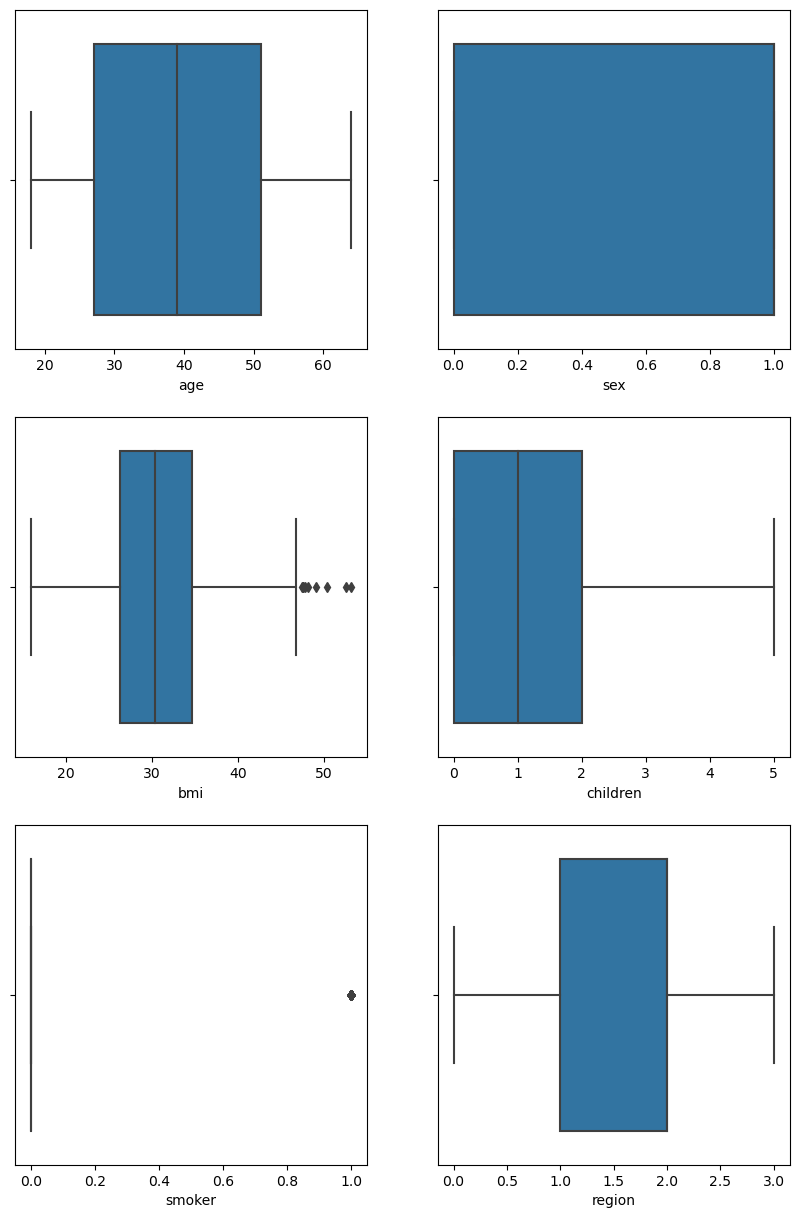

In [17]:
fig, axs = plt.subplots( 3,2,figsize=(10,15))
axs = axs.flatten()
for i in range(len(df.columns)-1):
    sns.boxplot(data=df, x=df.columns[i], ax=axs[i])


from the boxplot we can conclude that:
* age,region columns have no outlier
* bmi column has some outliers

# Exploring Sex & Smoker  column

Text(0.5, 1.0, 'Box Distribution of sex for male=1 and female=0')

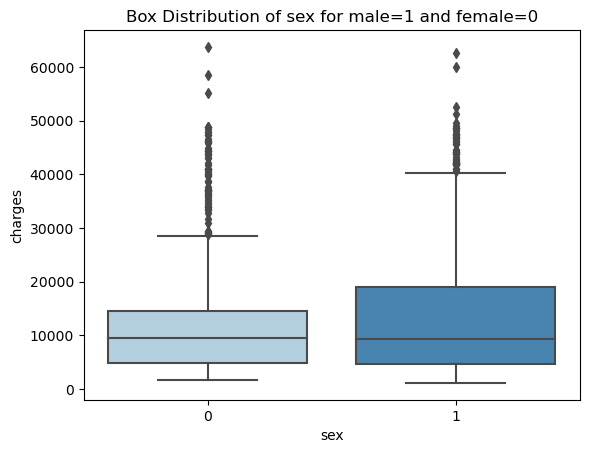

In [18]:
sns.boxplot(x="sex", y="charges",data = df,palette = 'Blues')
plt.title('Box Distribution of sex for male=1 and female=0')

In this exploration,we have found that males pay more charges than females. we deduced from this boxplot that,females pay less charges(3rd quartile Q3) than males but female patients charges data shows more outlier.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker'>

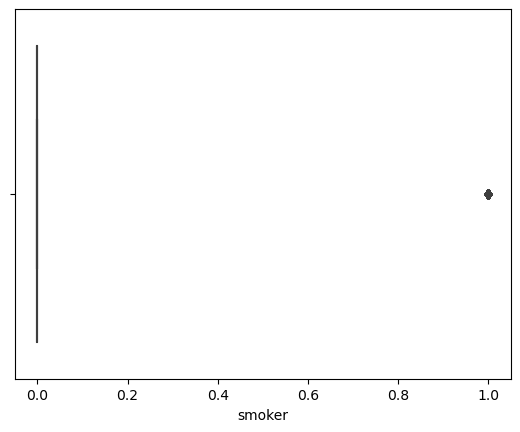

In [19]:
sns.boxplot(df['smoker'])


from the boxplot of smoker,we found outliers.
Now it's time to analyze the outlier to determine which type of smoker this means: smokers or non-smokers. Let's make a box plot according to smokers and non-smokers so that we will be able to get a clearance.

Text(0.5, 1.0, 'Box Distribution of charges for smokers and non-smokers')

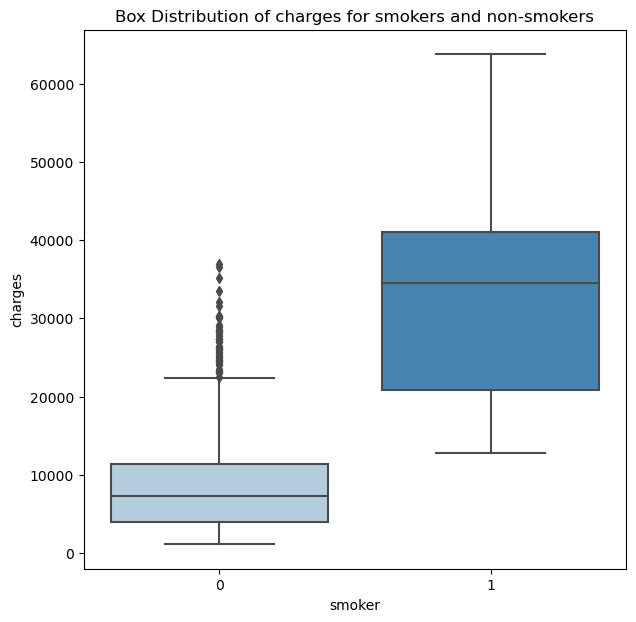

In [20]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(x="smoker", y="charges", data = df,palette = 'Blues')
ax.set_title('Box Distribution of charges for smokers and non-smokers')


from this boxplot we found two  clearances which are:
 * smokers pay more charges than non-smokers.
 * Smokers have no outliers. Actually, the outliers we have found belongs to smokers.<br>
Now should we keep this outlier or not.<br>

I keep the outliers because there may be an exception in some cases, such as when nonsmokers/male/female have a stroke, a heart attack, any severe diseases ,or are involved in an accident. 

# IQR(Inter Quartile Range)

In [21]:
#bmi column
percentile25 = df['bmi'].quantile(0.25)
percentile75 = df['bmi'].quantile(0.75)

iqr=percentile75-percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [22]:
df[df['bmi'] > upper_limit]


,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


In [23]:
df[df['bmi'] < lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [24]:
upper_limit

47.31500000000001

from IQR  we found that we have data that are greater than the upper limit but no data avaiable for lower limit
* upper limit is 47.3
* We must now decide whether to keep this outlier or remove them. 
* the max bmi is around 53 that is not far away from momal samples.we keep the outlier as it is because bmi>40 is known as severe obesity.

# Data Distribution

describe gives us the statistical status of data

In [25]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [26]:
df.describe(include='all').loc[['mean','50%']]

,age,sex,bmi,children,smoker,region,charges
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300


median = middle of value = 50%
* normal distribution= mean=median
* mean and median values of age,bmi,smoker columns are very close to each other
* but charges column is rightly skewed as mean>median

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

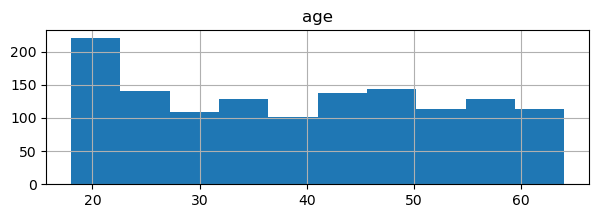

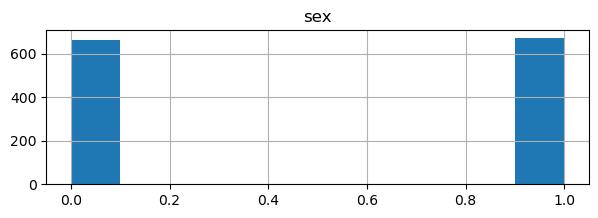

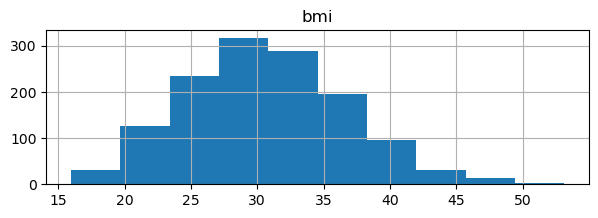

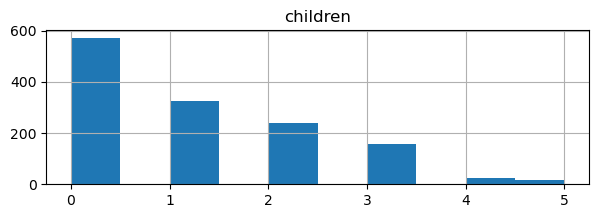

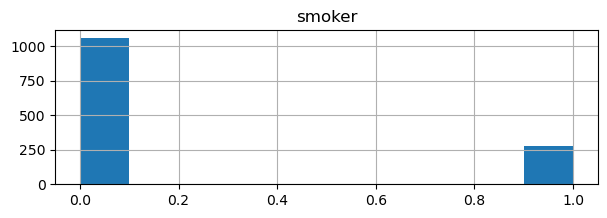

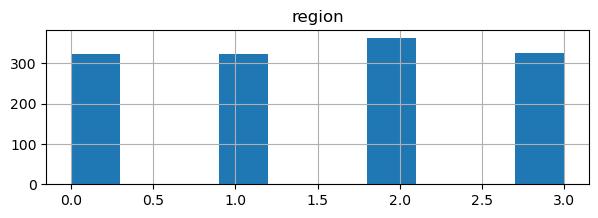

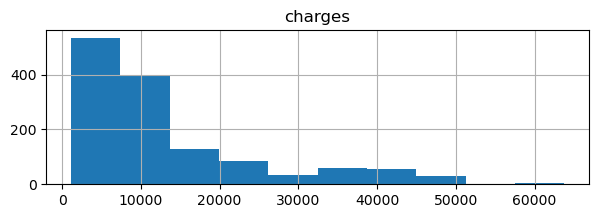

In [28]:
col=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for i in col:
    plt.figure(figsize=(7,2))
    df[i].hist()
    #sns.distplot(df[i])
    plt.title(i)
df.skew()
#df.kurt()

In [29]:
df = df[df['bmi']>0]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:xlabel='Log of Number of Words/Tokens'>

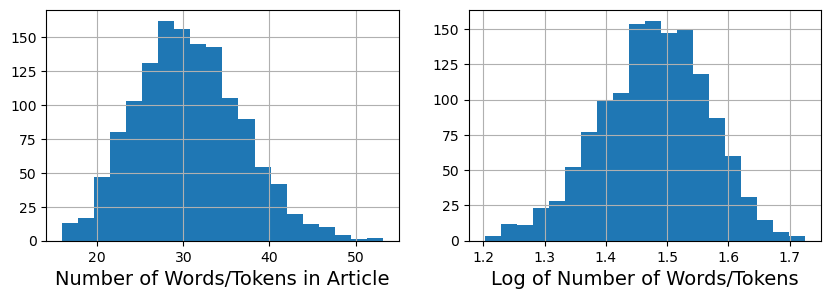

In [30]:
import matplotlib.pyplot as plt
import numpy as np
df['log_bmi'] = np.log10(df['bmi'])

fig,(ax1, ax2) = plt.subplots(1,2,figsize=(10,3))
#print(fig)
ax1.set_xlabel('Number of Words/Tokens in Article', fontsize=14)
ax2.set_xlabel('Log of Number of Words/Tokens', fontsize=14)

df['bmi'].hist(ax=ax1, bins=20)
df['log_bmi'].hist(ax=ax2, bins=20)



age bmi,smoker column have a closer normal distribution ,if we have applied any transformer that would not affect  distribution

# 2. Apply polynomial regression to predict & test

Define x & y
* we apply two analyses to make a comparison of which one performs better<br>
step 1)selecting all the features as input <br>
step 2)Based on the Pearson correlation map, select age, smoker, and BMI as features. <br>

In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'log_bmi'],
      dtype='object')

apply step -1 when comment out the step-2

In [32]:
# step1
# x=df.iloc[:,0:6]
# y=df['charges']
# x

apply step -2 when comment out the step-1

In [33]:
#step-2
x=df[['age','bmi','smoker']]
y=df['charges']
x

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


Split the dataset

In [34]:
#split the dataset for train and test purpose
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
lr = LinearRegression()   #Creating the Linear Regression Model
lr.fit(x_train, y_train)                #Training the Model with X_train & y_train
pred =lr.predict(x_test)               #Predicting the X_test 

print('Accuracy score is:',lr.score(x_test,y_test).round(2))

#Testing the model accuracy with different paramtes
r2   = r2_score(y_test, pred).round(2)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
#rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error


#Defining a DataFrame 
results = pd.DataFrame([['Linear Regression', r2, mae]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error'])

#Printing the Model Results with different Metrics
results

Accuracy score is: 0.76


,Model,R-squared (R²),Mean Absolute Error
0,Linear Regression,0.76,3881.894393


step-1:r2 score=75% <br>
step-2:r2 score=76%

# Polynomial Regression

In [37]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

for i in range(2, 11):
    poly_transform = PolynomialFeatures(degree=i)
    x_poly_train = poly_transform.fit_transform(x_train)
    x_poly_test = poly_transform.transform(x_test)

    regressor = LinearRegression()
    regressor.fit(x_poly_train, y_train)
    #print(regressor.score(x_test,y_test))
    # Visualizing the Polymonial Regression results
    print('deg :', i, 'MAE: ', mean_absolute_error(y_test, regressor.predict(x_poly_test)))
    #print('r2 score is : ',r2_score(y_test, regressor.predict(x_poly_test)))



deg : 2 MAE:  2524.415479925895
deg : 3 MAE:  2546.9147777093553
deg : 4 MAE:  2491.078219911164
deg : 5 MAE:  2494.1569879816684
deg : 6 MAE:  2470.325616197039
deg : 7 MAE:  2524.8570306665943
deg : 8 MAE:  3271.5834880652324
deg : 9 MAE:  2822.701032291632
deg : 10 MAE:  2931.3761005043484


we have attained lower MAE when degree=3,when applying step-1<br>
we have attained lower MAE when degree=6,when applying step-2

In [38]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #import the model

i=6

poly_reg = PolynomialFeatures(degree=i)
X_poly = poly_reg.fit_transform(x_train)
x_test = poly_reg.transform(x_test)

#print(X_poly)

pol_reg = LinearRegression()
pol_reg.fit(X_poly,y_train)



pred =pol_reg.predict(x_test)               #Predicting the X_test 

r2   = r2_score(y_test, pred).round(2)             # Getting the R-squared (R²)
mae  = mean_absolute_error(y_test, pred)  # Getting the Mean Absolute Error
#rmse = np.sqrt(mse)                       # Getting the Root Mean Squared Error


#Defining a DataFrame 
results = pd.DataFrame([['Polinomial Linear Regression', r2, mae]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error'])

#Printing the Model Results with different Metrics
results

,Model,R-squared (R²),Mean Absolute Error
0,Polinomial Linear Regression,0.85,2470.325616


step-1:r2 score=83%<br>
step-2:r2 score=85%

Now we can conclude that, in both cases of linear and polynomial regression, a selected feature gives us better accuracy than passing all the features as input.

In [39]:
evaluate={
    'actual data':np.array(y_test),
    'predicted data':np.array(pred),

}
evaluate=pd.DataFrame(evaluate)
evaluate.tail

<bound method NDFrame.tail of      actual data  predicted data
0    42983.45850    45396.431280
1    11353.22760    13887.597835
2    11879.10405    13531.074511
3     5662.22500     8225.981318
4     5709.16440     8403.691564
..           ...             ...
263   7153.55390     7710.338445
264  14474.67500    15904.464557
265   2459.72010     4709.888388
266  49577.66240    50069.156038
267  10355.64100    12596.385502

[268 rows x 2 columns]>

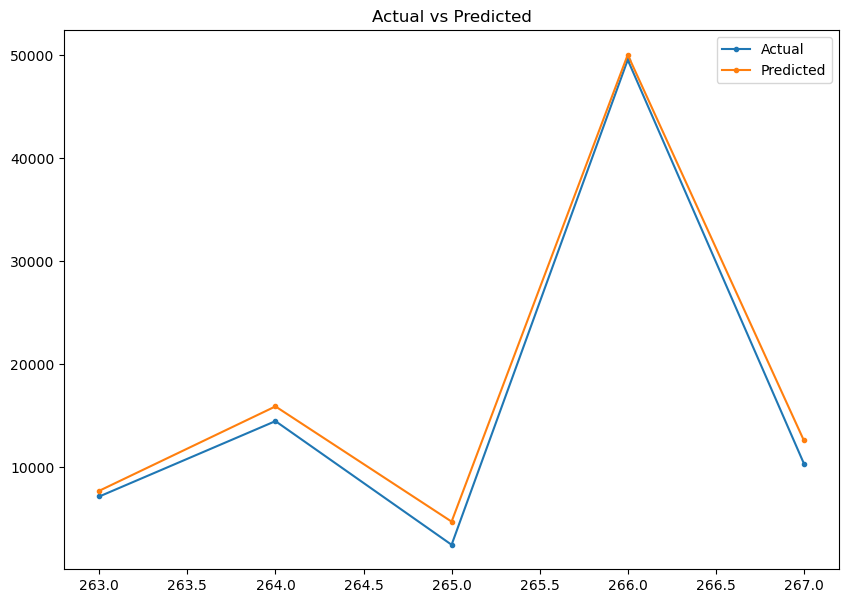

In [40]:
plt.figure(figsize=(10,7))
plt.plot(evaluate['actual data'].tail(),marker='.',label='Actual')
plt.plot(evaluate['predicted data'].tail(),marker='.',label='Predicted')
plt.title("Actual vs Predicted")
plt.legend()